In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.models import Sequential
from keras.layers import LSTM, Dense
import tensorflow as tf
import os

In [2]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)



13568290/13568290 [==============================] - 0s 0us/step


In [3]:
df=pd.read_csv(csv_path)
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [4]:
df=df[5::6]
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [5]:
df.shape

(70091, 15)

In [6]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')

In [7]:
df.head(5)
df[26:]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-02 03:00:00,02.01.2009 03:00:00,998.69,-4.45,268.81,-5.15,94.80,4.39,4.16,0.23,2.59,4.16,1292.69,0.65,1.00,203.30
2009-01-02 04:00:00,02.01.2009 04:00:00,998.32,-4.58,268.71,-5.22,95.20,4.34,4.14,0.21,2.58,4.14,1292.83,0.77,1.38,190.20
2009-01-02 05:00:00,02.01.2009 05:00:00,998.10,-4.96,268.34,-5.50,96.00,4.22,4.05,0.17,2.53,4.06,1294.44,0.79,1.25,22.22
2009-01-02 06:00:00,02.01.2009 06:00:00,998.00,-4.43,268.88,-4.94,96.20,4.39,4.23,0.17,2.64,4.23,1291.66,0.81,2.13,40.88
2009-01-02 07:00:00,02.01.2009 07:00:00,998.17,-4.28,269.02,-4.89,95.50,4.44,4.24,0.20,2.65,4.25,1291.15,0.53,1.13,156.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:10:00,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.60
2016-12-31 20:10:00,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.40
2016-12-31 21:10:00,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.70


In [8]:
def slice_time_series(data, column_name, window_size, step_size):

    sliced_data = []
    column = data[column_name]
    for i in range(0, len(column) - window_size + 1, step_size):
        window = column[i:i + window_size]
        sliced_data.append(window.values)

    sliced_data = pd.DataFrame(sliced_data, columns=[f"{column_name}_window_{i}" for i in range(window_size)])

    return sliced_data

In [9]:
window_size = 5
step_size = 5
sliced_data = slice_time_series(df, 'T (degC)', window_size, step_size)

<Axes: >

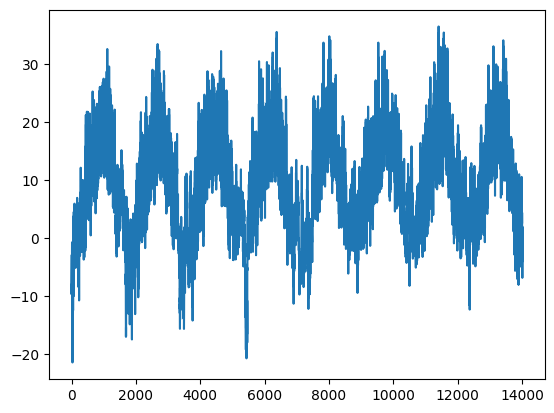

In [10]:
temp = sliced_data['T (degC)_window_0']
temp.plot()

In [11]:
def df_to_X_y(temp, window_size=5):
  df_as_np=temp.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+5]]
    X.append(row)
    label = df_as_np[i+5]
    y.append(label)
  return np.array(X), np.array(y)

In [12]:
WINDOW_SIZE=5
X, y=df_to_X_y(temp, WINDOW_SIZE)
X.shape, y.shape

((14013, 5, 1), (14013,))

In [13]:
X_train, y_train = X[:12000], y[:12000]
X_val, y_val = X[12000:13000], y[12000:13000]
X_test, y_test = X[13000:], y[13000:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((12000, 5, 1), (12000,), (1000, 5, 1), (1000,), (1013, 5, 1), (1013,))

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.metrics import Precision
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import F1Score
from tensorflow.keras.optimizers import Adam

Setup the model

In [15]:
from keras.src.layers import InputLayer
model1 = Sequential()
model1.add(InputLayer((5,1)))
model1.add(LSTM(64))
model1.add(Dense(8,'relu'))
model1.add(Dense(1, 'linear'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Develop the model

In [16]:
from keras.src.mixed_precision.loss_scale_optimizer import optimizer
cp=ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

Fit the model

In [17]:
 history=model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp])

Epoch 1/10
375/375 [==============================] - 19s 41ms/step - loss: 89.5554 - root_mean_squared_error: 9.4634 - val_loss: 18.0628 - val_root_mean_squared_error: 4.2500
Epoch 2/10
375/375 [==============================] - 10s 27ms/step - loss: 24.0879 - root_mean_squared_error: 4.9079 - val_loss: 11.0040 - val_root_mean_squared_error: 3.3172
Epoch 3/10
375/375 [==============================] - 6s 15ms/step - loss: 16.8828 - root_mean_squared_error: 4.1089 - val_loss: 9.4621 - val_root_mean_squared_error: 3.0760
Epoch 4/10
375/375 [==============================] - 6s 16ms/step - loss: 13.0204 - root_mean_squared_error: 3.6084 - val_loss: 7.6616 - val_root_mean_squared_error: 2.7680
Epoch 5/10
375/375 [==============================] - 5s 14ms/step - loss: 10.5102 - root_mean_squared_error: 3.2419 - val_loss: 7.3734 - val_root_mean_squared_error: 2.7154
Epoch 6/10
375/375 [==============================] - 6s 15ms/step - loss: 9.6154 - root_mean_squared_error: 3.1009 - val_loss

32/32 [==============================] - 0s 3ms/step - loss: 5.9813 - root_mean_squared_error: 2.4457
Validation Loss: [5.981338024139404, 2.4456775188446045]


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


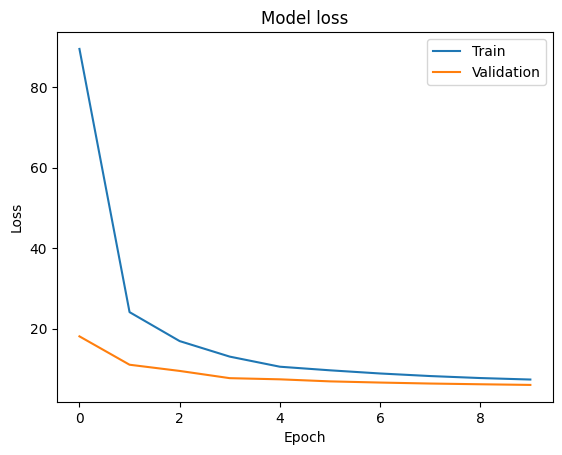

In [18]:
# Evaluate the model on the validation set
val_loss = model1.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss}')

# Optionally, you can save the trained model
model1.save('lstm.h5')

# Plot training history
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Save the model for use

In [19]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

Train the Model on the Training Dataset

In [20]:
train_predictions=model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions': train_predictions, 'Actuals': y_train})
train_results

375/375 [==============================] - 1s 2ms/step


,Train Predictions,Actuals
0,-5.692670,-4.29
1,-5.475617,-4.28
2,-5.175274,-3.12
3,-4.773487,-2.88
4,-4.429263,-4.02
...,...,...
11995,5.913430,6.07
11996,10.775464,14.02
11997,9.617585,9.95
11998,7.027457,7.57


Visualize the actual and predicted datasets

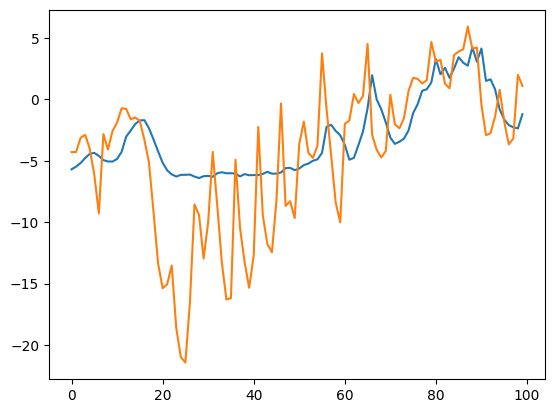

In [21]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:100])
plt.plot(train_results['Actuals'][:100])

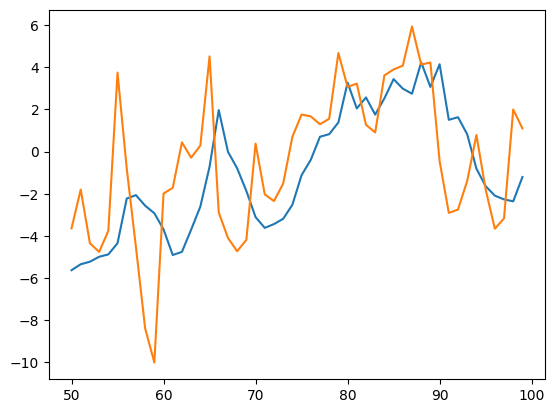

In [22]:
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [24]:
train_results.index=df.head(12000).index

(array([14245., 14276., 14304., 14335., 14365., 14396., 14426., 14457.]),
 [Text(14245.0, 0, '2009-01'),
  Text(14276.0, 0, '2009-02'),
  Text(14304.0, 0, '2009-03'),
  Text(14335.0, 0, '2009-04'),
  Text(14365.0, 0, '2009-05'),
  Text(14396.0, 0, '2009-06'),
  Text(14426.0, 0, '2009-07'),
  Text(14457.0, 0, '2009-08')])

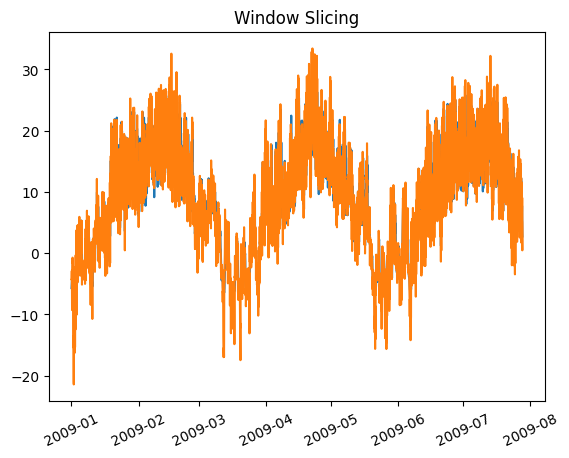

In [25]:
plt.plot(train_results['Train Predictions'][:5000])
plt.plot(train_results['Actuals'][:5000])
plt.title("Window Slicing")
plt.xticks(rotation=25)

validated the model on the validation dataset

In [ ]:
val_predictions=model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions': val_predictions, 'Actuals': y_val})
val_results

Visualize the validation results

In [ ]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [ ]:
plt.plot(val_results['Val Predictions'][50:100])
plt.plot(val_results['Actuals'][50:100])

In [ ]:
plt.plot(val_results['Val Predictions'])
plt.plot(val_results['Actuals'])

In [ ]:
test_predictions=model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions': test_predictions, 'Actuals': y_test})
test_results

Visualize the test results

In [ ]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

In [ ]:
plt.plot(test_results['Test Predictions'][50:100])
plt.plot(test_results['Actuals'][50:100])

In [ ]:
plt.plot(test_results['Test Predictions'])
plt.plot(test_results['Actuals'])

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, precision_score, f1_score, recall_score

# Assuming you have the 'train_results' DataFrame from your code

# Extract actuals and predictions
y_actual = train_results['Actuals']
y_pred = train_results['Train Predictions']

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_actual, y_pred)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(y_actual, y_pred)

# Calculate RMSE (Root Mean Squared Error)
rmse = mse**0.5

# Convert predictions to binary (e.g., for classification)
y_pred_binary = (y_pred > 0.5)  # Replace 'threshold_value' with your desired threshold
y_actual_binary = (y_actual > 0.5)
# Calculate accuracy
accuracy = accuracy_score(y_actual_binary, y_pred_binary)

# Calculate precision
precision = precision_score(y_actual_binary, y_pred_binary)

# Calculate F1-score
f1 = f1_score(y_actual_binary, y_pred_binary)

# Calculate recall
recall = recall_score(y_actual_binary, y_pred_binary)

# Print the metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")
print(f"Recall: {recall}")
